In [2]:
import tensorflow as tf
import numpy as np
import PIL
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
import sys

In [85]:
#for running with commandline
layers = []
epochs = 10

for i in range(len(sys.argv)):
    s = sys.argv[i]
    if s == "--layer" or s == "-l":
        layers.append((int(sys.argv[i]+1), sys.argv[i]+2))
    if s == "--epochs" or s == "-e":
        epochs = int(sys.argv[i]+1)

#Example:
#   python main.py -l 256 relu -l 128 relu -e 10

In [86]:
#For running in notebook
layers = [(512, "relu")]

In [6]:
#Load EMNIST
emnist_training = pd.read_csv("./data/emnist-byclass-train.csv")
emnist_testing = pd.read_csv("./data/emnist-byclass-test.csv")

#Map class names to label id
mappings = []
with open("./data/emnist-byclass-mapping.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        m = line.replace("\n", "").replace("\r", "").split(" ")
        mappings.append(m)

def letterString(i):
    return "{}, '{}'".format(i, chr(int(mappings[i][1])))

input_image_width = input_image_height = 28
number_of_classes = len(mappings)
print("{} classes {}x{}px".format(number_of_classes, input_image_width, input_image_height))

62 classes 28x28px


In [7]:
#Extract labels and image color data, and normalize colors
training_labels = np.array(emnist_training.iloc[:,0].values)
training_data = np.array(emnist_training.iloc[:,1:].values) / 255.0

testing_labels = np.array(emnist_testing.iloc[:,0].values)
testing_data = np.array(emnist_testing.iloc[:,1:].values) / 255.0

#Transform shape of images
training_data = training_data.reshape(training_data.shape[0], input_image_width, input_image_height, 1)
testing_data = testing_data.reshape(testing_data.shape[0], input_image_width, input_image_height, 1)

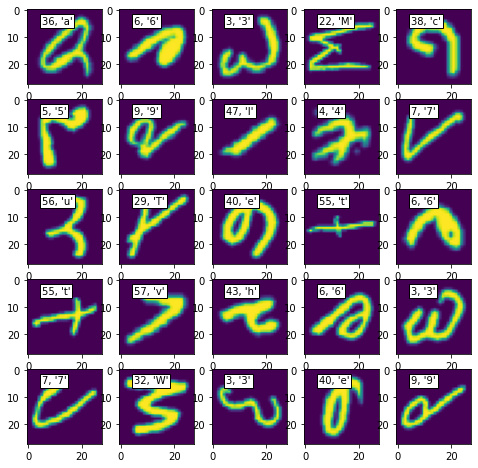

In [8]:
#Show some of the traning data
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(training_data[i])
    ax.text(5, 5, letterString(training_labels[i]), bbox={'facecolor': 'white', 'pad': 2})

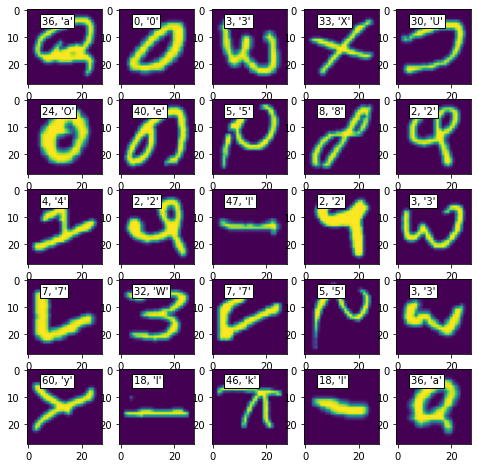

In [9]:
#Show some of the testing data
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(testing_data[i])
    ax.text(5, 5, letterString(testing_labels[i]), bbox={'facecolor': 'white', 'pad': 2})

In [87]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

for l in layers:
    n, a = l
    model.add(tf.keras.layers.Dense(n, activation=tf.keras.activations.get(a)))

model.add(tf.keras.layers.Dense(number_of_classes, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

fit_history = model.fit(training_data, training_labels, epochs=epochs)

Epoch 1/10
21811/21811 [==============================] - 42s 2ms/step - loss: 0.5963 - accuracy: 0.8057
Epoch 2/10
21811/21811 [==============================] - 37s 2ms/step - loss: 0.4842 - accuracy: 0.8335
Epoch 3/10
21811/21811 [==============================] - 37s 2ms/step - loss: 0.4645 - accuracy: 0.8390
Epoch 4/10
21811/21811 [==============================] - 37s 2ms/step - loss: 0.4529 - accuracy: 0.8417
Epoch 5/10
21811/21811 [==============================] - 36s 2ms/step - loss: 0.4452 - accuracy: 0.8442
Epoch 6/10
21811/21811 [==============================] - 36s 2ms/step - loss: 0.4402 - accuracy: 0.8458
Epoch 7/10
21811/21811 [==============================] - 36s 2ms/step - loss: 0.4350 - accuracy: 0.8471
Epoch 8/10
21811/21811 [==============================] - 37s 2ms/step - loss: 0.4309 - accuracy: 0.8483
Epoch 9/10
21811/21811 [==============================] - 36s 2ms/step - loss: 0.4268 - accuracy: 0.8497
Epoch 10/10
21811/21811 [==============================

Text(0, 0.5, 'Accuracy')

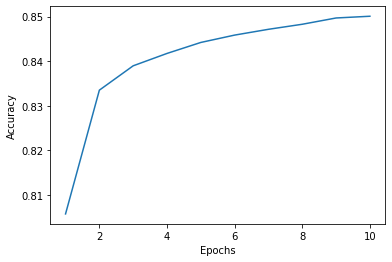

In [88]:
#Show a plot which graphs the accuracy over time in training
plt.plot(
    range(1, len(fit_history.history['accuracy']) + 1), 
    fit_history.history['accuracy'], label='Accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [89]:
#Use testing data to evaluate the accuracy of the ANN
loss, accuracy = model.evaluate(testing_data, testing_labels)
print("Loss: {:.2f}\nAccuracy: {:.2f}%".format(loss, accuracy * 100.0))

3636/3636 [==============================] - 3s 933us/step - loss: 0.5248 - accuracy: 0.8356
Loss: 0.52
Accuracy: 83.56%


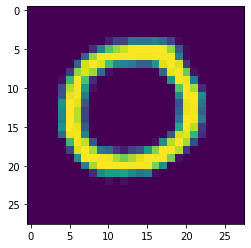

In [47]:
#Testing with own images loaded from .png:s
img = tf.keras.utils.load_img(
    "./data/images/imgO.png", target_size=(28, 28), color_mode = "grayscale"
)

#Normalize
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255.0

plt.imshow(img_array[0])

In [48]:
#Predict class using loaded image
predictions = model.predict(img_array)

score = tf.nn.softmax(predictions[0])
guess = np.argmax(score)
print(letterString(guess))

24, 'O'


In [ ]:
#Select a random image from the testing set
testi = randrange(len(testing_data))

#Use the ANN model to predict it's class
predictions = model.predict(testing_data)
score = tf.nn.softmax(predictions[testi])
guess = np.argmax(score)

#Show the selected image
plt.imshow(testing_data[testi])

print(testing_data[testi])

#Print the prediced class and it's confidence
print(
    "Guessing {} with a {:.2f}% confidence."
    .format(letterString(guess), 100 * np.max(score))
)

#Compate with the known correct label from the testing dataset and determine if the moddel was correct or not
if guess == testing_labels[testi]:
    print("Correct!")
else:
    print("Incorrect!")